Download dataset p1_iris.csv from Blackboard. The data set consists of 150 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris ver- sicolor). 
Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 

In [140]:
import pandas as pd

data = pd.read_csv('C:/Users/brody/Downloads/p1_iris.csv', header= None)
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Explore the data and briefly summarize your findings.

   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
sepal length:
	 Mean = 5.84
	 Standard deviation = 0.83
	 Minimum = 4.30
	 Maximum = 7.90
sepal width:
	 Mean = 3.05
	 Standard deviation = 0.43
	 Minimum = 2.00
	 Maximum = 4.40
petal length:
	 Mean = 3.76
	 Standard deviation = 1.76
	 Minimum = 1.00
	 Maximum = 6.90
petal width:
	 Mean = 1.20
	 Standard deviation = 0.76
	 Minimum = 0.10
	 Maximum = 2.50
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64
        sepal length  sepal width  petal length  petal width            class
count     150.000000   150.000000    150.000000   150.0000

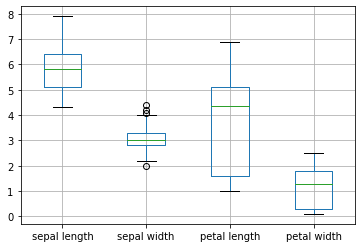

In [141]:
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

print(data.head())

from pandas.api.types import is_numeric_dtype

for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % data[col].mean())
        print('\t Standard deviation = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data[col].min())
        print('\t Maximum = %.2f' % data[col].max())
        
print(data['class'].value_counts())

print(data.describe(include='all'))

print('Covariance:')
print(data.cov())

print('Correlation:')
print(data.corr())

data.boxplot()

Sepal Length is approximatly normally distributed with no outliers, a mean of 5.84 cm and standard deviation of 0.83 cm
Sepal Width is approximatly normally distributed with many outliers, a mean of 3.05 cm and standard deviation of 0.43 cm 
Petal Length is left skewed with no significant outliers, a mean of 3.76 cm and standard deviation of 1.76 cm
Petal Width is left skewed with no significant outliers, a mean of 1.20 cm and standard deviation of .76 cm
We can see that Sepal Length has a strong positive correlation with petal length and petal width and weak negative correlation with Sepal Width.
Sepal Width has a moderate negative correrelation with petal length and petal width.
Finally, Petal Length and Petal Width have a strong positive correlation with eachother.

We also see that there are 50 observations in each species of plant, and all observations have no missing measurements 

Build the Decision Tree Classifier and plot the resulting tree (again using T5-1. Classification tutorial as a starting point). Explore different options and criteria for building of the decision tree and summarize your findings.

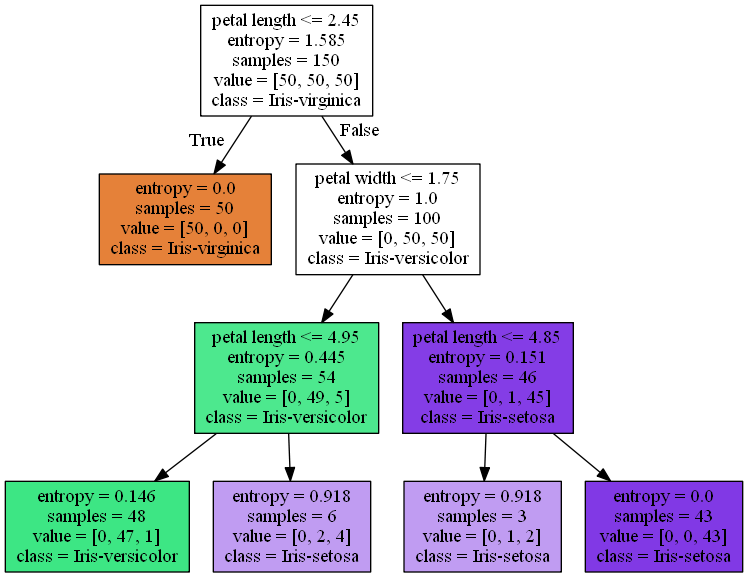

In [142]:
from sklearn import tree

Y = data['class']
X = data.drop(['class'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X, Y)

import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

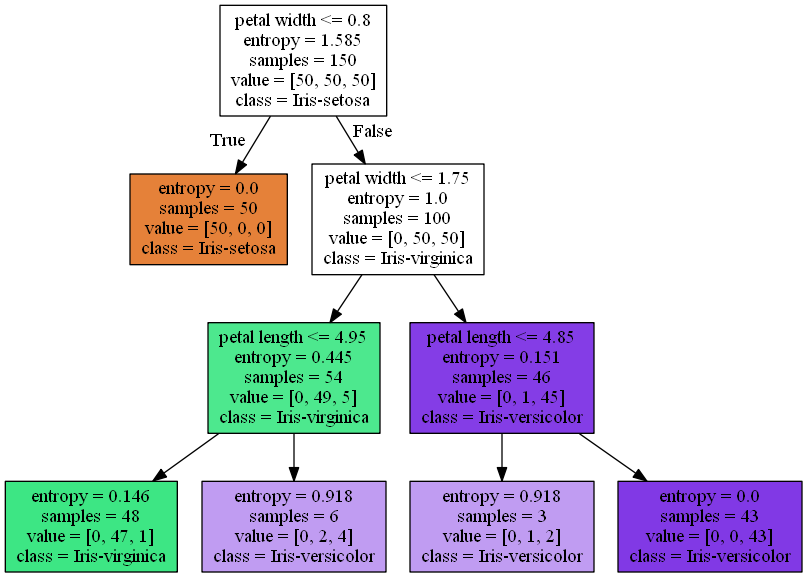

In [143]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X, Y)

import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

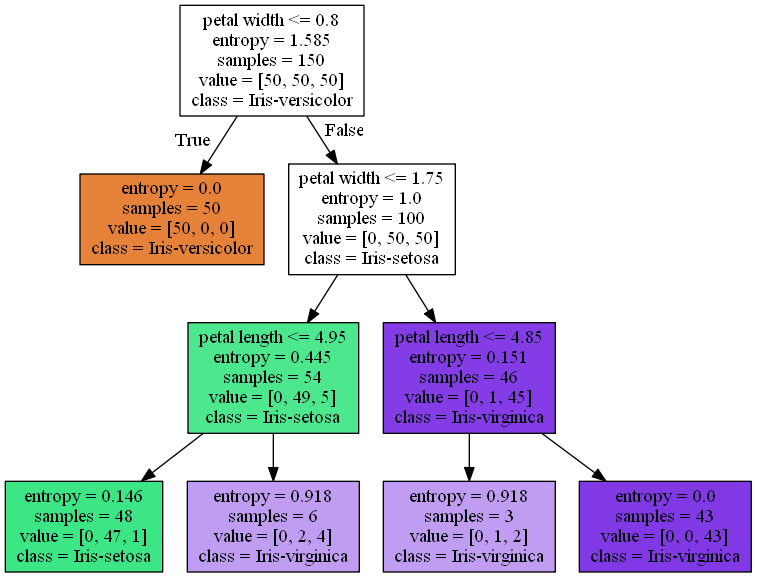

In [144]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X, Y)

import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['Iris-versicolor', 'Iris-setosa', 'Iris-virginica'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

We can get our entropy down to a very low level using only 3 splits. Using only petal length and petal width, we have already narrowed our results down quite drasically. We can see that no matter what order we put them in, the entropy results will be the same (mathematically makes sense as the number of splits and type of splits don't change). Let's see what happens when we analyze using a gini index and use more splits.

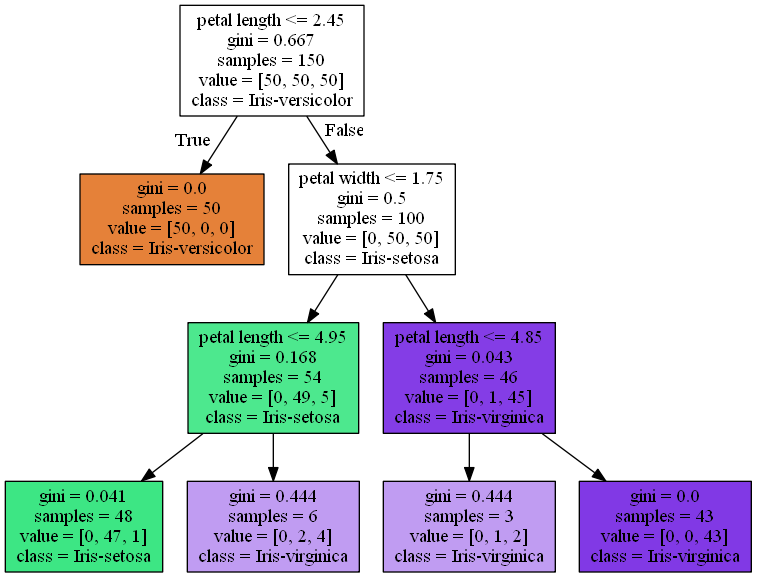

In [145]:
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=3)
clf = clf.fit(X, Y)

import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['Iris-versicolor', 'Iris-setosa', 'Iris-virginica'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

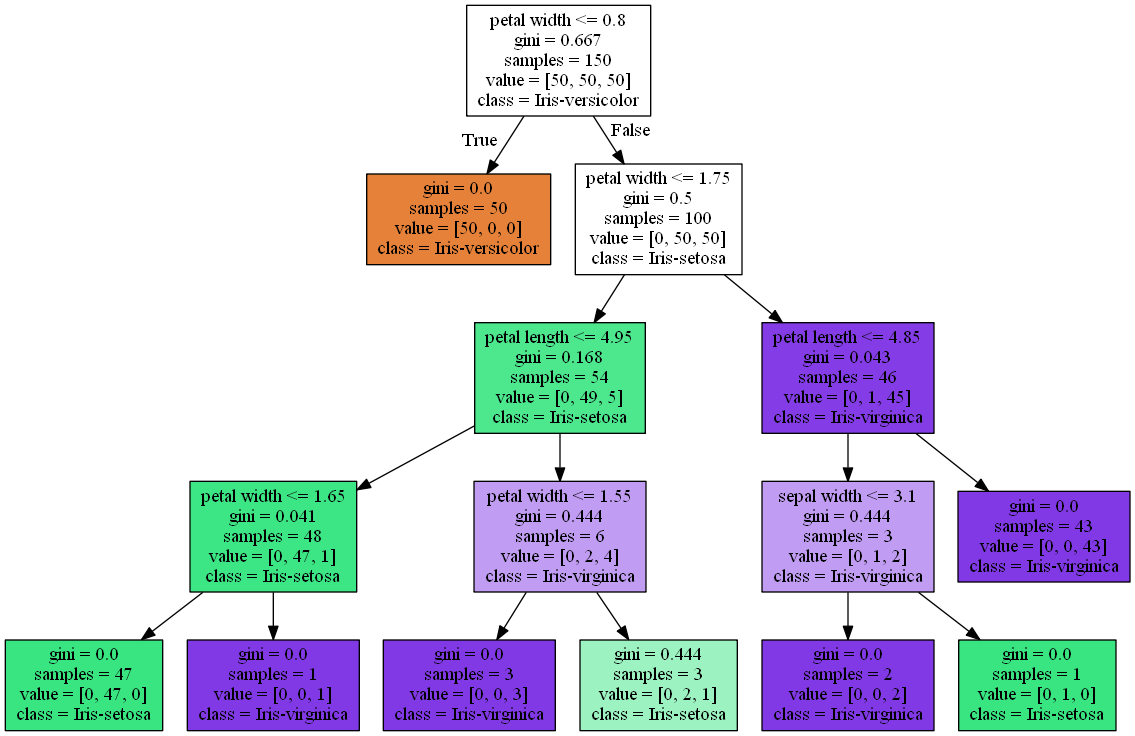

In [146]:
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=4)
clf = clf.fit(X, Y)

import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['Iris-versicolor', 'Iris-setosa', 'Iris-virginica'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

We see that we have a quite low gini index as well, and we can reduce our variability further when we introduce an extra split, utilizing the sepal length variable. Let's randomly subset the data into training and testing data to see if 3 or 4 splits perform better overall.

Split the data into training and testing sets and explore the behavior of train and test errors depending on the choice of the model and the relative size of train and test sets.
Summarize your findings.

In [147]:
from sklearn.model_selection import train_test_split

Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.33, random_state=1)

clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=3)
clf = clf.fit(X_train, Y_train)

predY = clf.predict(X_test)
predictions = pd.concat([Y_test,pd.Series(predY,name='Predicted Class')], axis=1)
predictions

from sklearn.metrics import accuracy_score
print('Accuracy on test data is %.2f' % (accuracy_score(Y_test, predY)))

Accuracy on test data is 0.96


This is a good starting accuraccy, but let's try changing some variables to see if we can improve it (Normally would use k-folds and cross validation approaches, but don't know how to do my prefered methods in python yet). Also, note that because we are using the same random seed between trials, this random split may be better for some variable changes than others, but I use the seed because the differences between trials can be more accuratly compared.

In [148]:
from sklearn.model_selection import train_test_split

Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=1)

clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=3)
clf = clf.fit(X_train, Y_train)

predY = clf.predict(X_test)
predictions = pd.concat([Y_test,pd.Series(predY,name='Predicted Class')], axis=1)
predictions

from sklearn.metrics import accuracy_score
print('Accuracy on test data is %.2f' % (accuracy_score(Y_test, predY)))

Accuracy on test data is 0.97


If we decrease our test size, our accuracy goes up, but this is likely just because we are over fitting and under testing the data.

In [149]:
from sklearn.model_selection import train_test_split

Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4, random_state=1)

clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=3)
clf = clf.fit(X_train, Y_train)

predY = clf.predict(X_test)
predictions = pd.concat([Y_test,pd.Series(predY,name='Predicted Class')], axis=1)
predictions

from sklearn.metrics import accuracy_score
print('Accuracy on test data is %.2f' % (accuracy_score(Y_test, predY)))

Accuracy on test data is 0.97


By increasing our test sample size, we do improve the accuracy and since our data is so small (in comparison to the machine learning problems I'm used to), a 40:60 split may be better as to not overfit the data and improve our testing abilities

In [150]:
from sklearn.model_selection import train_test_split

Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4, random_state=1)

clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=10)
clf = clf.fit(X_train, Y_train)

predY = clf.predict(X_test)
predictions = pd.concat([Y_test,pd.Series(predY,name='Predicted Class')], axis=1)
predictions

from sklearn.metrics import accuracy_score
print('Accuracy on test data is %.2f' % (accuracy_score(Y_test, predY)))

Accuracy on test data is 0.97


We can see that increasing the depth didn't improve the model, so we are likely just overfitting the data at that point. Let's see where our data hits our accuracy cap:

Text(0, 0.5, 'Accuracy')

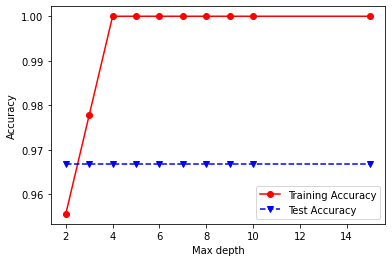

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random
from sklearn import tree
from sklearn.metrics import accuracy_score

#########################################
# Model fitting and evaluation
#########################################

maxdepths = [2,3,4,5,6,7,8,9,10,15]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

This shows that a depth of 4 should be plenty to cover the variability of the model without overfitting. If we were looking to recreate this model, a 40:60 split and a max depth of 4, should be plenty to summarize the data with good accuracy.

Exploration
Download dataset p1_credit_data.csv from Blackboard. The data set contains financial ratios, industry sector, and credit ratings for a list of corporate customers. This is simulated, not real data. The first column is a customer ID. Then we have five columns of financial ratios: (i) Working capital / Total Assets (WC_TA); (ii) Retained Earnings / Total Assets (RE_TA); (iii) Earnings Before Interests and Taxes / Total Assets (EBIT_TA); (iv) Market Value of Equity / Book Value of Total Debt (MVE_BVTD); (v) Sales / Total Assets (S_TA). Next, we have an industry sector label, an integer value ranging from 1 to 12. The last column has the credit rating assigned to the corporate customer.

WC_TA:
	 Mean = 0.14
	 Standard deviation = 0.18
	 Minimum = -2.25
	 Maximum = 0.85
RE_TA:
	 Mean = 0.21
	 Standard deviation = 0.34
	 Minimum = -3.29
	 Maximum = 1.77
EBIT_TA:
	 Mean = 0.05
	 Standard deviation = 0.03
	 Minimum = -0.59
	 Maximum = 0.21
MVE_BVTD:
	 Mean = 2.06
	 Standard deviation = 4.05
	 Minimum = 0.02
	 Maximum = 119.05
S_TA:
	 Mean = 0.31
	 Standard deviation = 0.25
	 Minimum = 0.03
	 Maximum = 7.03
Industry:
	 Mean = 6.39
	 Standard deviation = 3.45
	 Minimum = 1.00
	 Maximum = 12.00
BBB    1015
BB      927
AAA     580
A       575
AA      385
B       320
CCC     130
Name: Rating, dtype: int64
              WC_TA        RE_TA      EBIT_TA     MVE_BVTD         S_TA  \
count   3932.000000  3932.000000  3932.000000  3932.000000  3932.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mea

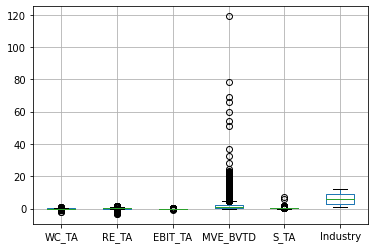

In [152]:
data1 = pd.read_csv('C:/Users/brody/Downloads/p1_credit_data.csv', header= 'infer')
data1
#ID is getting in the way of our data, we can bring it back later if we want
data = data1.drop(columns=['ID'])
for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % data[col].mean())
        print('\t Standard deviation = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data[col].min())
        print('\t Maximum = %.2f' % data[col].max())
        
print(data['Rating'].value_counts())

print(data.describe(include='all'))

print('Covariance:')
print(data.cov())

print('Correlation:')
print(data.corr())

print(data.boxplot())

Boxplots are messy, so let's look at them one by one

AxesSubplot(0.125,0.125;0.775x0.755)


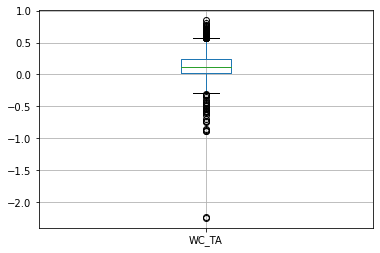

In [153]:
print(data.boxplot(column='WC_TA'))

We can see this data is left skewed with many outliers (including a particularly influential one at -2.25), a mean of 0.14, and standard deviation of 0.18

AxesSubplot(0.125,0.125;0.775x0.755)


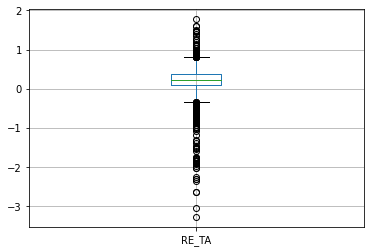

In [154]:
print(data.boxplot(column='RE_TA'))

This data appears to be left skewed with many outliers, a mean of 0.21, and standard deviation of 0.34

AxesSubplot(0.125,0.125;0.775x0.755)


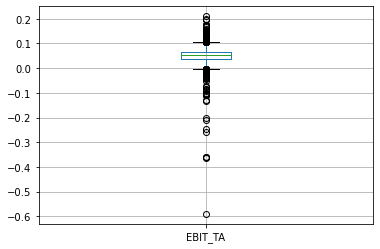

In [155]:
print(data.boxplot(column='EBIT_TA'))

This data appears to be left skewed with many outliers (including a particularly influential one at -0.59), a mean of 0.05, and standard deviation of 0.03

AxesSubplot(0.125,0.125;0.775x0.755)


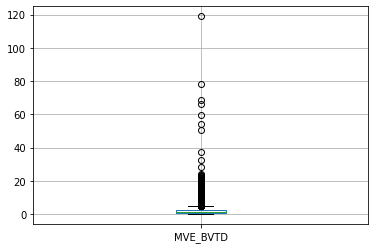

In [156]:
print(data.boxplot(column='MVE_BVTD'))

This data appears to be right skewed with many outliers (including a particularly influential one at 119.05), a mean of 2.06, and standard deviation of 4.05

AxesSubplot(0.125,0.125;0.775x0.755)


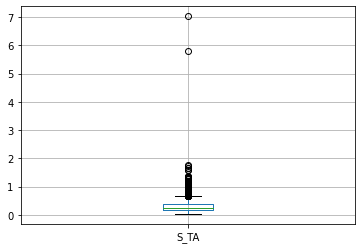

In [157]:
print(data.boxplot(column='S_TA'))

This data appears to be right skewed with many outliers (including a particularly influential one around 7.03), a mean of .31, and standard deviation of .25

AxesSubplot(0.125,0.125;0.775x0.755)


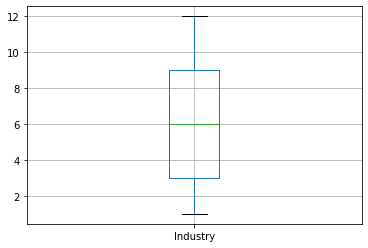

In [158]:
print(data.boxplot(column='Industry'))

This data appears to be normally distributed with no outliers, a mean of 6.39, and standard deviation of 3.45. I do include this variable in the model. I could be wrong in this assumption, but I would think that knowing what industry we are working in actually might have an effect on the model (If I were a consultant, I would talk with the company about this before I included it in the analysis).

We also know that overall, there were 580 AAA, 385 AA, 575 A, 1015 BBB, 927 BB, 320 B, and 130 CCC ratings

Suppose that you are hired as a data mining consultant by a FinTech company that is looking to build a predictive model based on this dataset. Following the groundwork laid during the warm-up exercise build a decision tree model that calculates the corporate credit rating from the financial ratios. Discuss the approach, the findings and the challenges. 

(FYI, I apoligize for using the same variable names as in the pervious problem, so be careful to make sure and execute the code in the correct order or you may get errors)

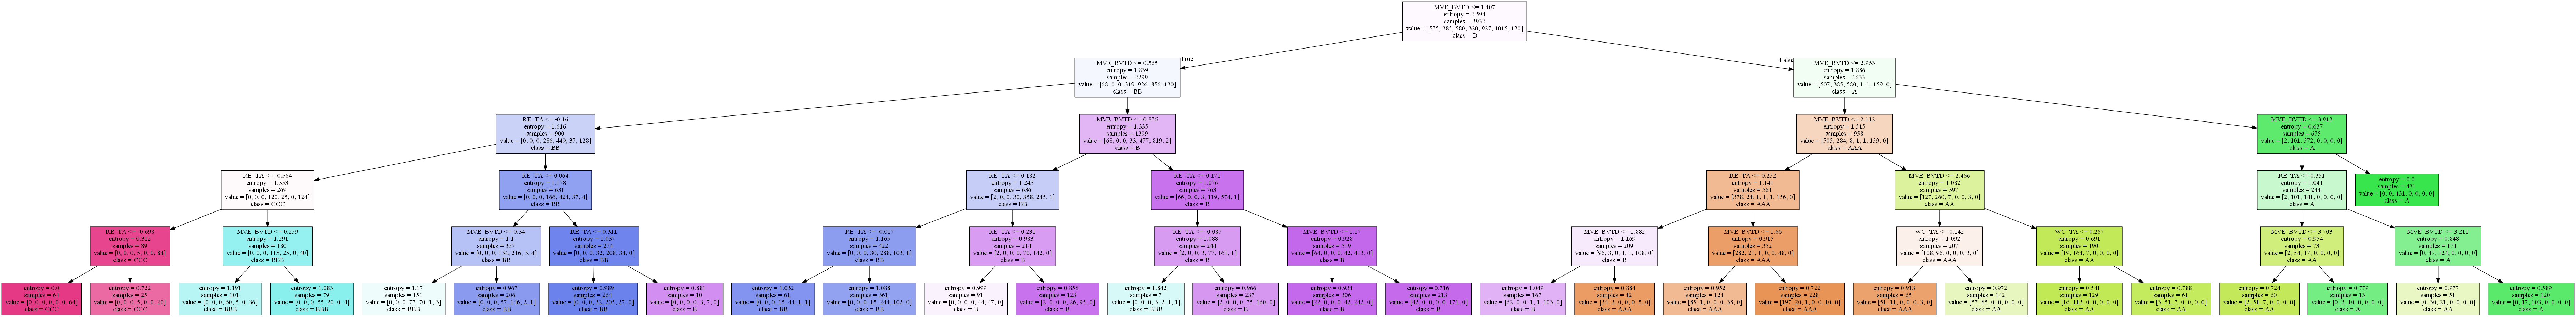

In [159]:
from sklearn import tree

Y = data['Rating']
X = data.drop(['Rating'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
clf = clf.fit(X, Y)

import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['AAA', 'AA', 'A', 'BBB','BB','B','CCC'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

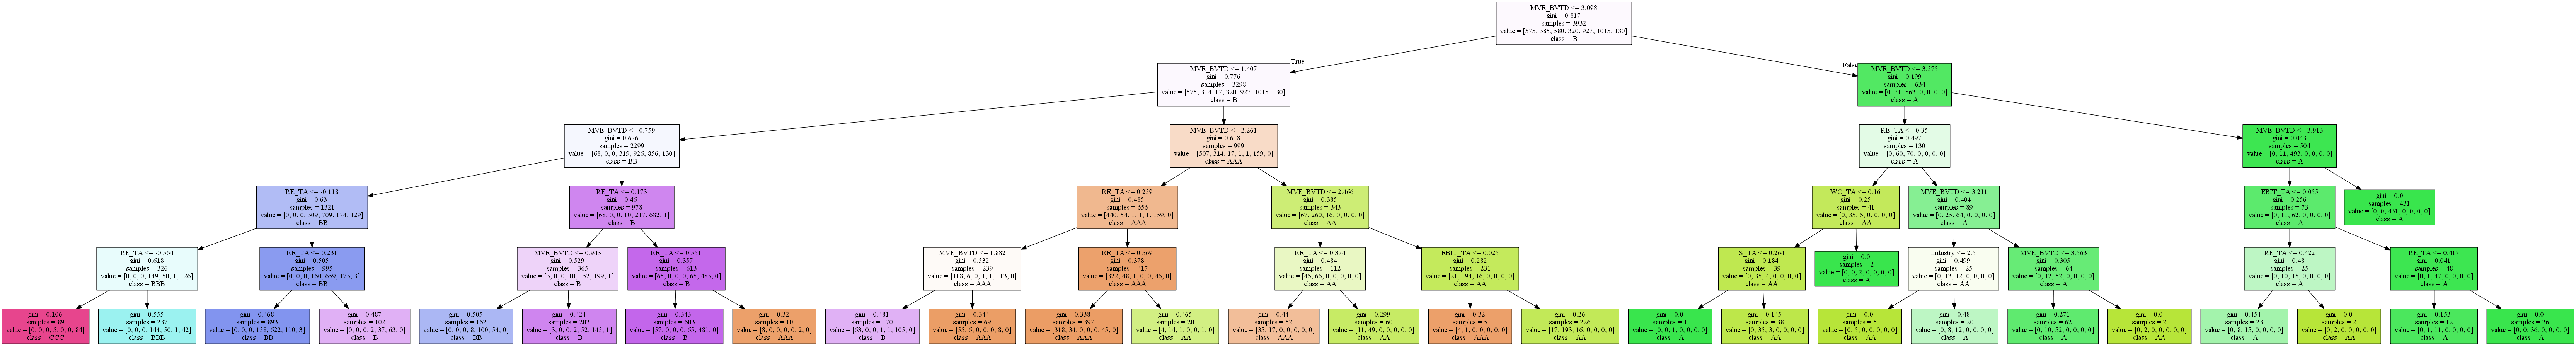

In [160]:
from sklearn import tree

Y = data['Rating']
X = data.drop(['Rating'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=5)
clf = clf.fit(X, Y)

import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['AAA', 'AA', 'A', 'BBB','BB','B','CCC'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In this first test, we see that 5 splits seems to do a good job of explaining a large portion of the variability that we see in gini and entropy (We will test the number of splits more later). We can see that the first splits try to seperate the As from the Bs and Cs. It fails to do this in some places, but

In [162]:
from sklearn.model_selection import train_test_split

Y = data['Rating']
X = data.drop(['Rating'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.33, random_state=1)

clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=5)
clf = clf.fit(X, Y)

predY = clf.predict(X_test)
predictions = pd.concat([Y_test,pd.Series(predY,name='Predicted Class')], axis=1)
predictions

from sklearn.metrics import accuracy_score
print('Accuracy on test data is %.2f' % (accuracy_score(Y_test, predY)))

Accuracy on test data is 0.78


In [163]:
from sklearn.model_selection import train_test_split

Y = data['Rating']
X = data.drop(['Rating'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4, random_state=1)

clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=5)
clf = clf.fit(X_train, Y_train)

predY = clf.predict(X_test)
predictions = pd.concat([Y_test,pd.Series(predY,name='Predicted Class')], axis=1)
predictions

from sklearn.metrics import accuracy_score
print('Accuracy on test data is %.2f' % (accuracy_score(Y_test, predY)))

Accuracy on test data is 0.75


In [164]:
from sklearn.model_selection import train_test_split

Y = data['Rating']
X = data.drop(['Rating'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.33, random_state=1)

clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=8)
clf = clf.fit(X_train, Y_train)

predY = clf.predict(X_test)
predictions = pd.concat([Y_test,pd.Series(predY,name='Predicted Class')], axis=1)
predictions

from sklearn.metrics import accuracy_score
print('Accuracy on test data is %.2f' % (accuracy_score(Y_test, predY)))

Accuracy on test data is 0.73


In [165]:
from sklearn.model_selection import train_test_split

Y = data['Rating']
X = data.drop(['Rating'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.33, random_state=1)

clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=10)
clf = clf.fit(X_train, Y_train)

predY = clf.predict(X_test)
predictions = pd.concat([Y_test,pd.Series(predY,name='Predicted Class')], axis=1)
predictions

from sklearn.metrics import accuracy_score
print('Accuracy on test data is %.2f' % (accuracy_score(Y_test, predY)))

Accuracy on test data is 0.72


We can see that the 33:66 split is a bit better than the 40:60 split. We also see that increasing the number of splits damages our test accuracy. We should look at a graph of the depths over a larger scale:

Text(0, 0.5, 'Accuracy')

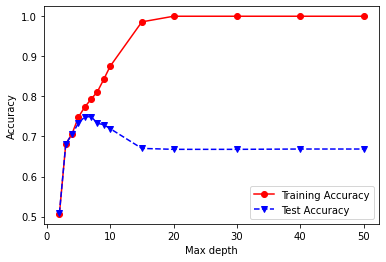

In [166]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random
from sklearn import tree
from sklearn.metrics import accuracy_score

#########################################
# Model fitting and evaluation
#########################################

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,30,40,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

We can see that our test accuracy maxes out around depth=7, so we will stick with that value for our final model

Accuracy on test data is 0.75


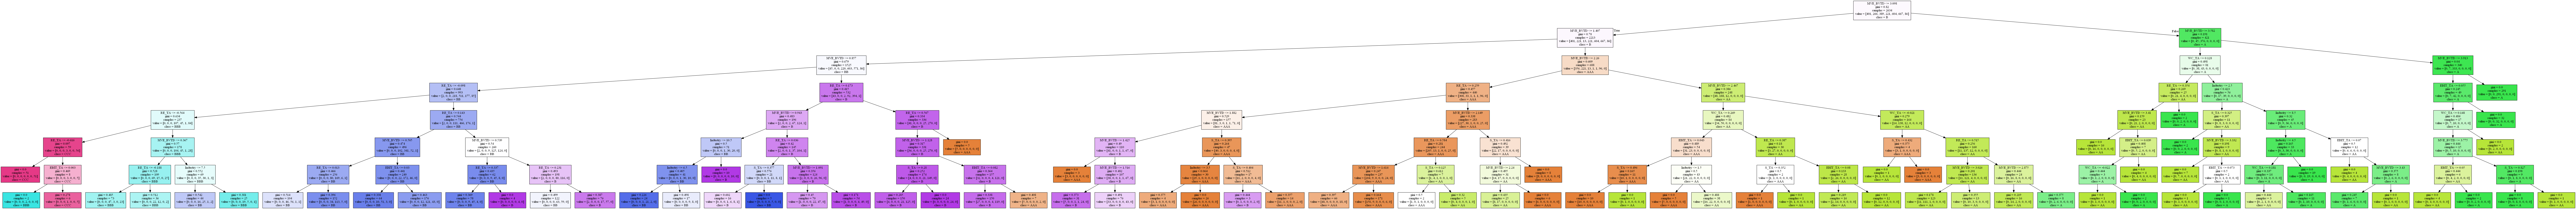

In [167]:
from sklearn.model_selection import train_test_split

Y = data['Rating']
X = data.drop(['Rating'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.33, random_state=1)

clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=7)
clf = clf.fit(X_train, Y_train)

predY = clf.predict(X_test)
predictions = pd.concat([Y_test,pd.Series(predY,name='Predicted Class')], axis=1)
predictions

from sklearn.metrics import accuracy_score
print('Accuracy on test data is %.2f' % (accuracy_score(Y_test, predY)))

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['AAA', 'AA', 'A', 'BBB','BB','B','CCC'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

   This model appears to fit the data will without overfitting the data. It seperates by As and Bs again using the ratio of Market Value of Equity / Book Value of Total Debt as our leading discriminator (Do keep in mind that this type of decision tree puts more importance on large variance, so that may be why this is the leading discriminator as upposed to a potentially more practical variable which I am not aware of because I don't have practical knowledge in this field), and then goes into subdivisions of As and Bs where we use our other ratios and our industry variable. (If I were a consultant, I would likely have more of a knowledge on what these ratios practically mean so we could decide how to interpret these splits better)
   It also does a decent job of finding outliers that get stuck in a different side of the decision tree. Keep in mind that there are a lot of nominal levels for the rating, so no matter how many observations and how many splits we use, we will always be challenegd with discriminating every level of the rating system (I would have like to use an ordinal logistic regression for this problem so we have a bit more statistical power in our interpretation, but for the scope of the class, I will stick with the decision tree for now). That being said, our decision tree does a fairly good job at discriminating between Ratings with a 75% test accuracy. With only 7 splits, interpretation becomes much easier as well, so overall, I would say we have a pretty good model.